# ACM : Análisis de Correspondencia Múltiple  
## Cómo los hábitos de sueño y rendimiento definen perfiles estudiantiles  

---

### 1. Contexto del problema  

En este estudio se trabaja con un **conjunto de datos recolectados por estudiantes de la asignatura *Probabilidad y Estadística I***. donde a partir de una muestra de 64 estudiantes, se tomaron datos relacionados con los hábitos de sueño, rendimiento, entre otros. 


Las variables recopiladas incluyen aspectos como:  
- Horas y calidad del sueño  
- Factores que afectan el descanso  
- Desempeño académico y puntualidad  
- Fatiga, concentración y actividades estudiantiles  
- Características académicas y demográficas (semestre, género, carrera, beca, etc.)  




### Variables del dataset

| **Variable**            | **Descripción** |
|--------------------------|-----------------|
| SEMESTRE                 | Semestre académico en el que se encuentra el estudiante |
| GENERO                   | Sexo del estudiante (masculino / femenino / otro) |
| CARRERA                  | Programa académico principal que cursa el estudiante |
| DOBLECARRERA             | Indica si el estudiante cursa un doble programa (sí / no) |
| HORAS                    | Cantidad promedio de horas que duerme el estudiante |
| SLEEP                    | Frecuencia de sueño adecuado (nunca, casi nunca, a veces, frecuentemente, siempre) |
| FACTORES                 | Razones que afectan el descanso (ej. estrés, trabajo, uso de pantallas, etc.) |
| CONCENTRACION            | Percepción del nivel de concentración en clases o estudios |
| DESEMPEÑO                | Autoevaluación del rendimiento académico |
| PUNTUALIDAD              | Nivel de puntualidad en clases o actividades académicas |
| FATIGA                   | Nivel de cansancio reportado por el estudiante |
| BECA                     | Si el estudiante cuenta con algún tipo de beca (sí / no) |
| RETIRO                   | Si ha realizado retiros de materias o asignaturas |
| CREDITOS                 | Número de créditos matriculados en el semestre |
| CALIDAD                  | Percepción de la calidad de sueño segun contextos académicos |
| ACTIVIDADES              | Participación en actividades extracurriculares (deportivas, culturales, etc.) |


### 2. Qué es el MCA?

Según un estudio en Medium de la comunidad KNIME ,el análisis de correspondencias múltiple es una técnica para analizar las relaciones entre variables categóricas y crear perfiles basados ​​en las proyecciones de las variables originales a las nuevas *dimensiones* que crea. Esto resulta bastante útil al momento de analizar y visualizar datos de encuestas.


Dado que estas dimensiones **no actúan de manera aislada**, sino que interactúan entre sí, es necesario emplear un **análisis multivariado**.  
Este tipo de análisis permite estudiar de forma conjunta las múltiples variables categóricas y descubrir **patrones de asociación** que no serían visibles mediante un análisis univariado o bivariado.  

En este caso, el **Análisis de Correspondencia Múltiple (ACM)** se convierte en la herramienta adecuada para:  
- Reducir la complejidad de los datos.  
- Visualizar relaciones entre categorías.  
- Construir perfiles estudiantiles más completos y representativos.  



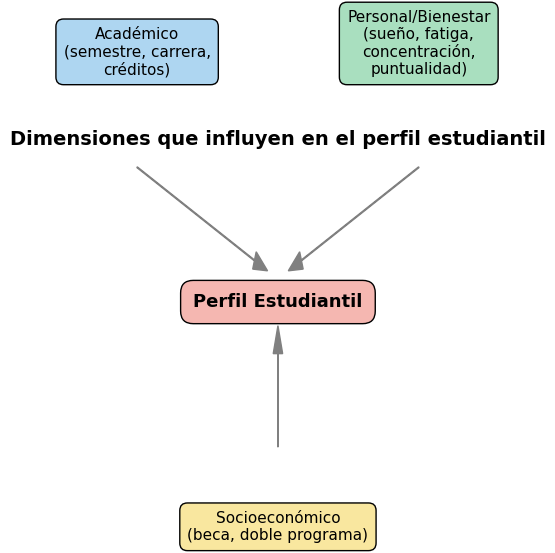

In [1]:
import matplotlib.pyplot as plt

# Crear figura
plt.figure(figsize=(4,4))

# Nodos principales
plt.text(0.2, 0.8, "Académico\n(semestre, carrera,\ncréditos)", ha="center", fontsize=11,
         bbox=dict(boxstyle="round,pad=0.5", fc="#AED6F1", ec="black"))
plt.text(0.8, 0.8, "Personal/Bienestar\n(sueño, fatiga,\nconcentración,\npuntualidad)", ha="center", fontsize=11,
         bbox=dict(boxstyle="round,pad=0.5", fc="#A9DFBF", ec="black"))
plt.text(0.5, 0.3, "Socioeconómico\n(beca, doble programa)", ha="center", fontsize=11,
         bbox=dict(boxstyle="round,pad=0.5", fc="#F9E79F", ec="black"))

# Nodo central: perfil
plt.text(0.5, 0.55, "Perfil Estudiantil", ha="center", fontsize=13, fontweight="bold",
         bbox=dict(boxstyle="round,pad=0.7", fc="#F5B7B1", ec="black"))

# Flechas
plt.arrow(0.2, 0.7, 0.25, -0.1, head_width=0.02, color="gray")
plt.arrow(0.8, 0.7, -0.25, -0.1, head_width=0.02, color="gray")
plt.arrow(0.5, 0.4, 0, 0.1, head_width=0.02, color="gray")

plt.axis("off")
plt.title("Dimensiones que influyen en el perfil estudiantil", fontsize=14, fontweight="bold")
plt.show()

### 3. Pasos para hacer un analisis de correspondencia múltiple

#### 1. Recopilación y organización de datos

El dataset está almacenado en un archivo `.csv`, donde:  
- Cada **fila** representa a un estudiante encuestado.  
- Cada **columna** corresponde a una variable de la encuesta.  

Las variables se agrupan en tres dimensiones principales:  

1. **Académicas**: semestre, carrera, créditos matriculados, retiros.  
2. **Personales y de bienestar**: horas de sueño, frecuencia del sueño (*sleep*), fatiga, concentración, puntualidad, calidad percibida.  
3. **Socioeconómicas**: beca, doble programa, participación en actividades.  

#### 2. Definición de Variables Activas vs Suplementarias en MCA

En el Análisis de Correspondencia Múltiple, es fundamental distinguir entre dos tipos de variables:

##### **Variables Activas**
Son las variables que **participan directamente** en la construcción de los ejes factoriales del MCA. Estas variables:
- Determinan la estructura de las dimensiones principales
- Contribuyen al cálculo de las coordenadas factoriales
- Son las que queremos analizar en profundidad para encontrar patrones

**Para nuestro estudio, las variables activas serán:**
- `SLEEP`: Frecuencia de sueño adecuado
- `CONCENTRACION`: Nivel de concentración en estudios
- `DESEMPENO`: Autoevaluación del rendimiento académico
- `PUNTUALIDAD`: Nivel de puntualidad
- `FATIGA`: Nivel de cansancio reportado
- `CALIDAD`: Percepción de la calidad de sueño

**¿Por qué estas variables son activas?**
Porque representan los **hábitos de sueño y rendimiento** que queremos analizar como fenómeno principal. Son las dimensiones centrales de nuestro estudio.

##### **Variables Suplementarias**
Son variables que **no participan** en la construcción de los ejes, pero se proyectan sobre ellos para:
- Ayudar en la interpretación de los resultados
- Caracterizar los perfiles encontrados
- Validar los patrones identificados

**Para nuestro estudio, las variables suplementarias serán:**
- `GENERO`: Para ver diferencias por sexo
- `CARRERA`: Para identificar patrones por programa académico
- `SEMESTRE`: Para analizar diferencias por nivel académico
- `BECA`: Para evaluar el factor socioeconómico

**¿Por qué estas variables son suplementarias?**
Porque son **características de contexto** que nos ayudan a interpretar y caracterizar los perfiles, pero no son el objeto principal de análisis.


In [12]:
# CARGA Y EXPLORACIÓN INICIAL DE DATOS
import pandas as pd

# Cargar el dataset de hábitos estudiantiles
df = pd.read_csv("habitos_estudiantes.csv", sep=";")

print("Dimensiones del dataset:", df.shape)
print("\nVisualización completa del dataset:")

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
display(df)

Dimensiones del dataset: (64, 16)

Visualización completa del dataset:


,SEMESTRE,GENERO,CARRERA,DOBLECARRERA,HORAS,SLEEP,FACTORES,CONCENTRACION,DESEMPENO,PUNTUALIDAD,FATIGA,BECA,RETIRO,CREDITOS,CALIDAD,ACTIVIDADES
0,2,Femenino,Administration de negocios internacionales,No,Entre 4 y 6 horas,Frecuentemente,Estrés académico,"Si, en la mayoría de ocasiones","Si, mucho",Rara vez,"Si, pero nunca lo considere",No,No,20,"Si, de forma constante",Deportes
1,4,Femenino,Administración de mercadeo y logística interna...,No,Entre 6 y 8 horas,Casi nunca,Ansiedad o preocupaciones personales,Solo en días de exámenes o entregas importantes,"Si, mucho","Si, varias veces","Si, lo he pensado seriamente",No,No,20,"No afecta mucho, lo manejo bien",Deportes
2,4,Masculino,Administración de mercadeo y logística interna...,No,Entre 6 y 8 horas,A veces,Malos hábitos de horario (acostarse tarde),"Si, siempre","Si, mucho",Nunca,"No, nunca lo he pensado",No,No,10,"Si, de forma constante",Trabajo
3,4,Femenino,Administración de mercadeo y logística interna...,No,Entre 4 y 6 horas,A veces,Malos hábitos de horario (acostarse tarde),"Si, en la mayoría de ocasiones","Si, mucho",Nunca,"No, nunca lo he pensado",No,No,Más de 20,Solo en semana de parciales y entregas,Deportes
4,5,Femenino,Ingeniería Química,No,Entre 6 y 8 horas,Casi nunca,Uso excesivo de celular o dispositivos electró...,Solo en días de exámenes o entregas importantes,Si pero de manera leve,"Si, varias veces","No, nunca lo he pensado",No,No,20,Solo en semana de parciales y entregas,Deportes
5,3,Femenino,Ingeniería Industrial,No,Entre 6 y 8 horas,A veces,Estrés académico,"Si, en la mayoría de ocasiones","Si, mucho",Rara vez,"No, nunca lo he pensado",Si,No,20,Solo en semana de parciales y entregas,Trabajo
6,5,Masculino,Ingeniería Mecánica,No,Menos de 4 horas,Casi nunca,Uso excesivo de celular o dispositivos electró...,"No, no he notado la diferencia",Si pero de manera leve,"Si, varias veces","Si, lo he pensado seriamente",Si,Si,20,No afecta en lo absoluto,Deportes
7,2,Masculino,Economia y finanzas internacionales,No,Entre 6 y 8 horas,Casi nunca,Ninguna de las anteriores,"No, no he notado la diferencia","Si, mucho",Nunca,"No, nunca lo he pensado",No,No,20,"No afecta mucho, lo manejo bien",Trabajo;Deportes
8,3,Masculino,Ingeniería Mecánica,No,Entre 6 y 8 horas,Frecuentemente,Estrés académico,"Si, en la mayoría de ocasiones",Si pero de manera leve,"Si, varias veces","Si, pero nunca lo considere",Si,No,15,"Si, de forma constante","Deportes;Arte (Todo tipo de arte ej: danza, fo..."
9,2,Femenino,Medicina,No,Entre 4 y 6 horas,Frecuentemente,Estrés académico,"Si, en la mayoría de ocasiones","Si, mucho",Rara vez,"No, nunca lo he pensado",No,No,Más de 20,Solo en semana de parciales y entregas,"Arte (Todo tipo de arte ej: danza, fotografía,..."


#### 2. Preprocesamiento de los datos

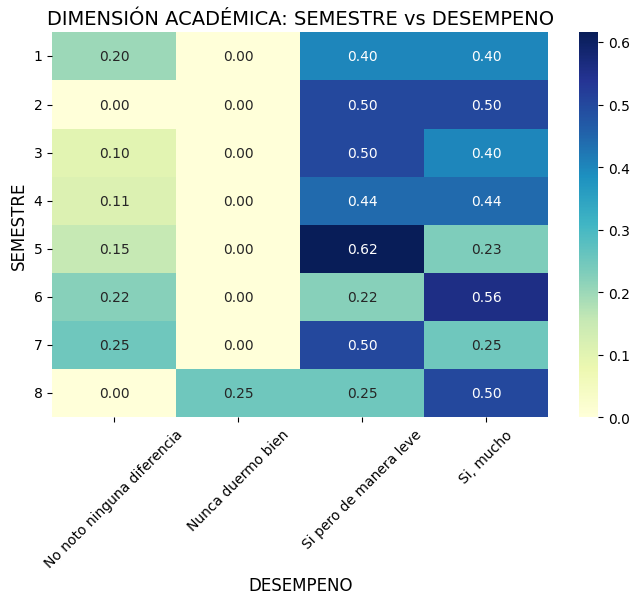

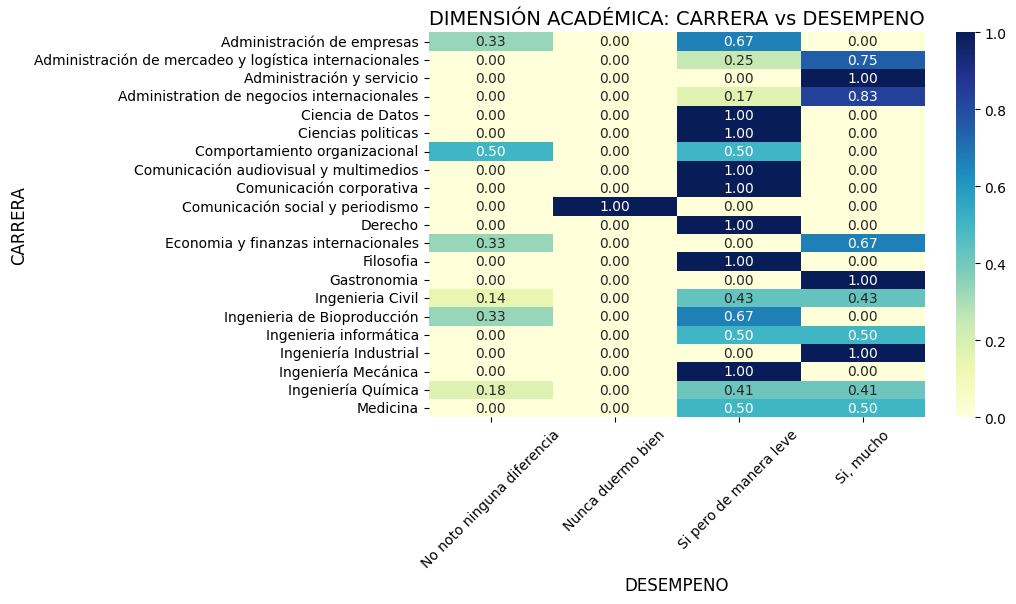

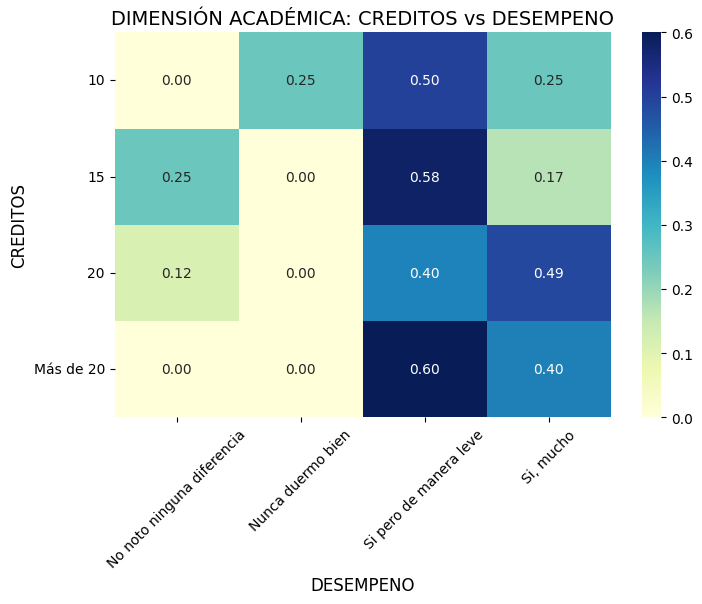

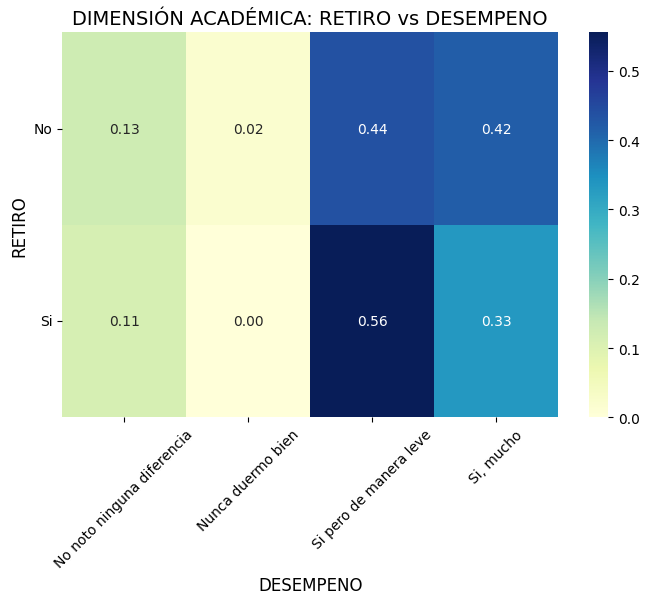

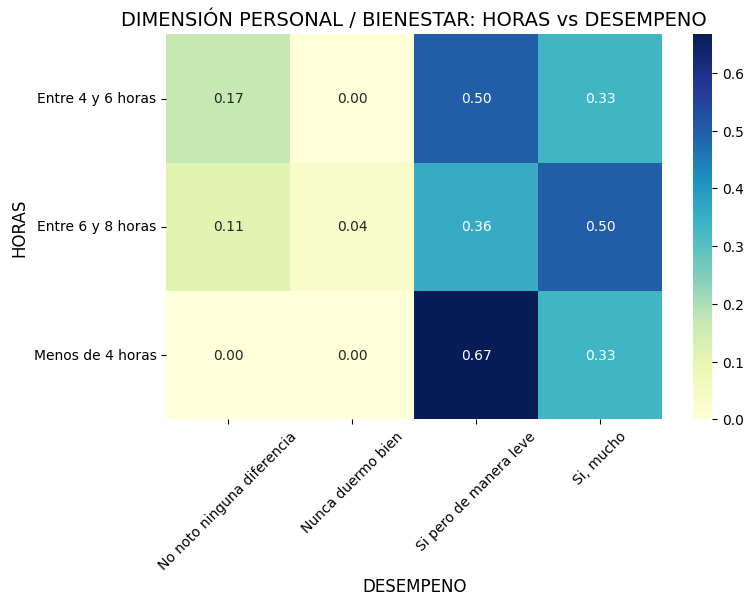

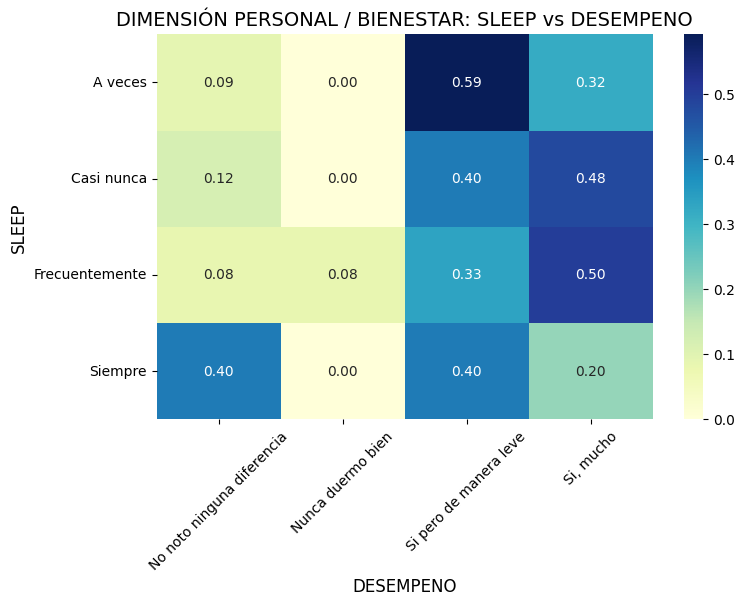

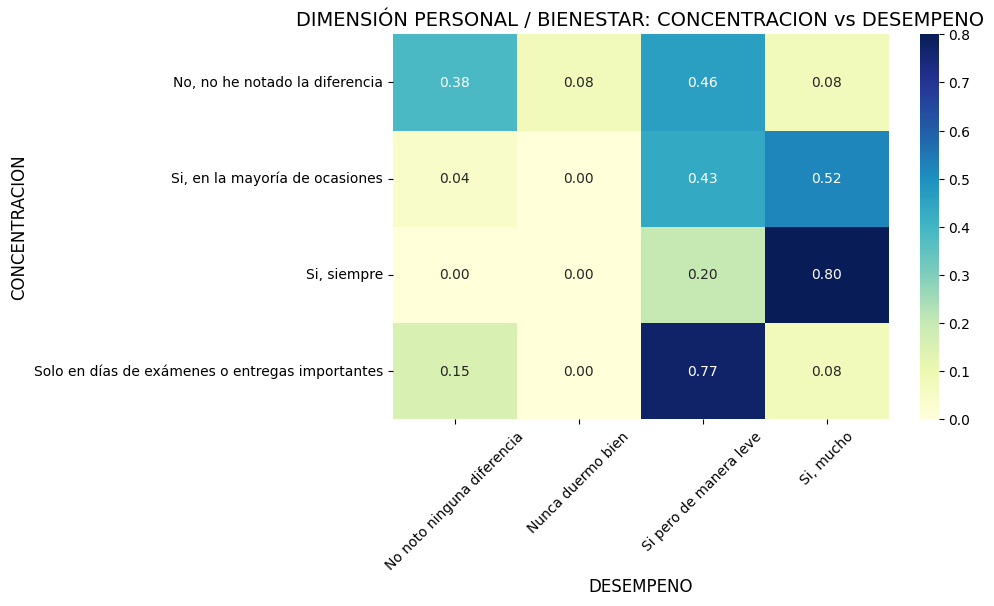

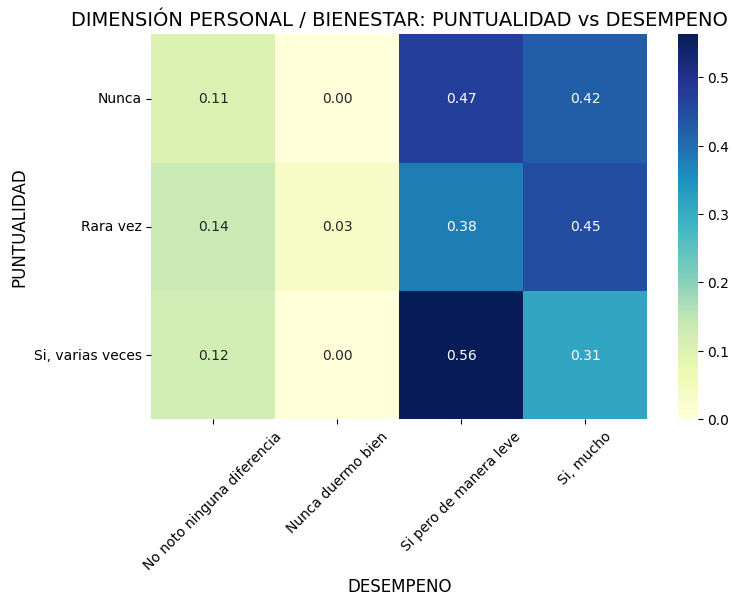

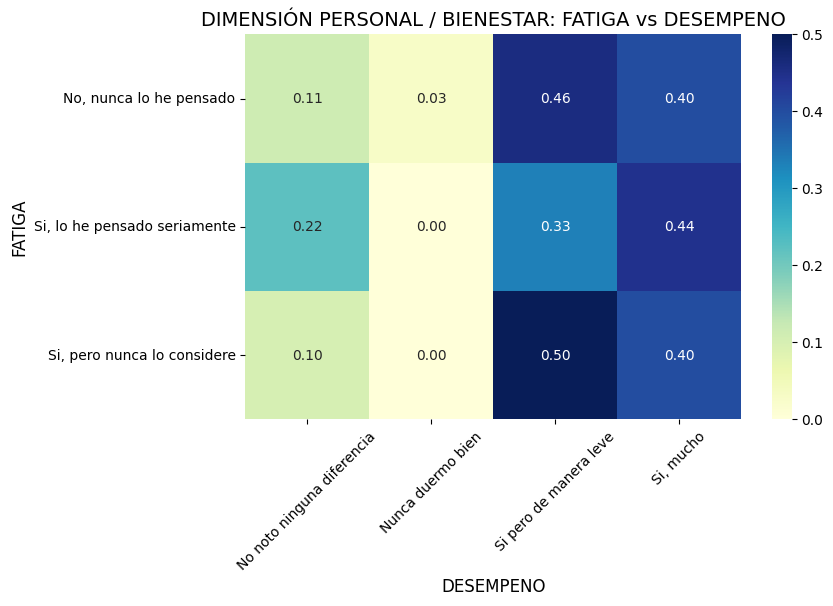

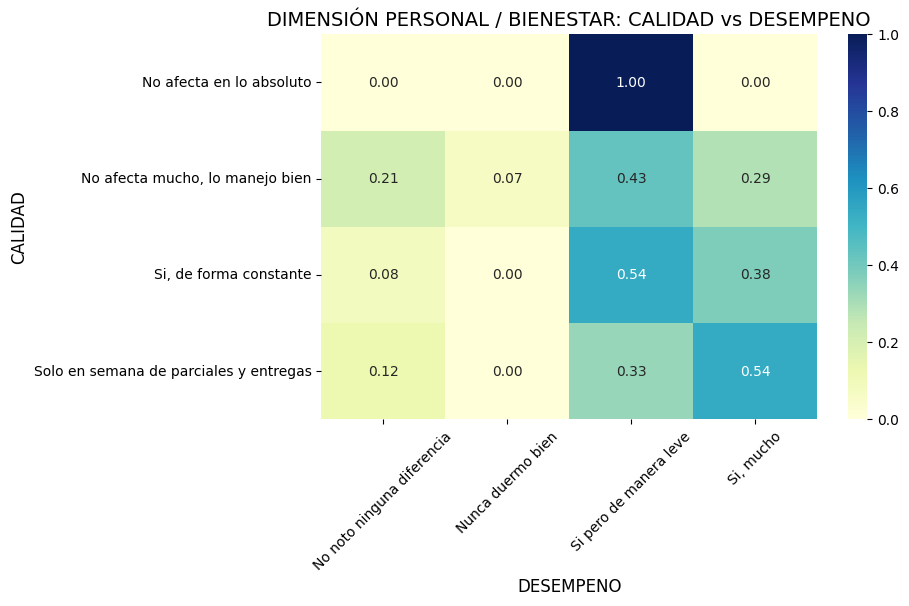

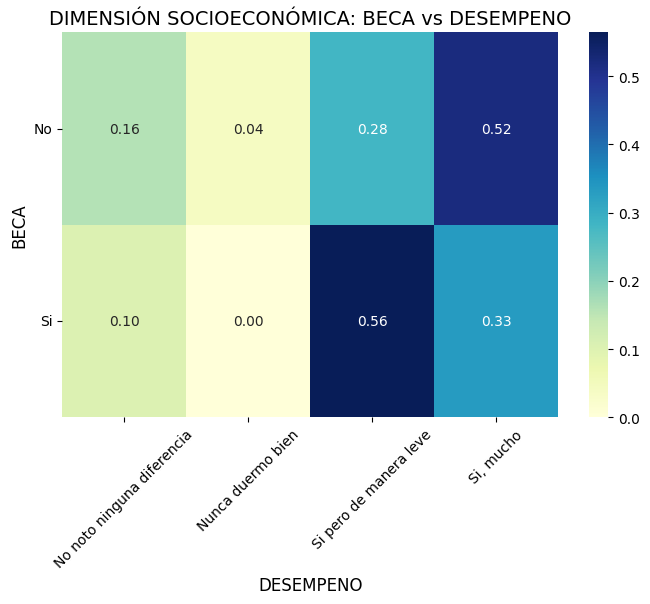

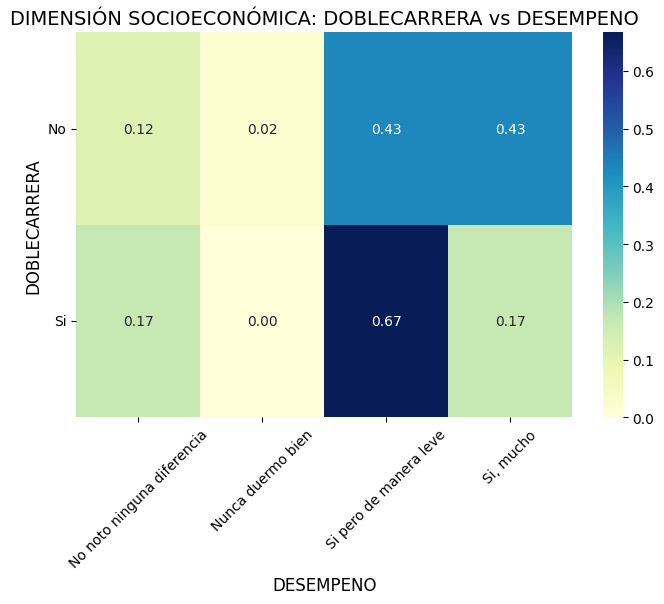

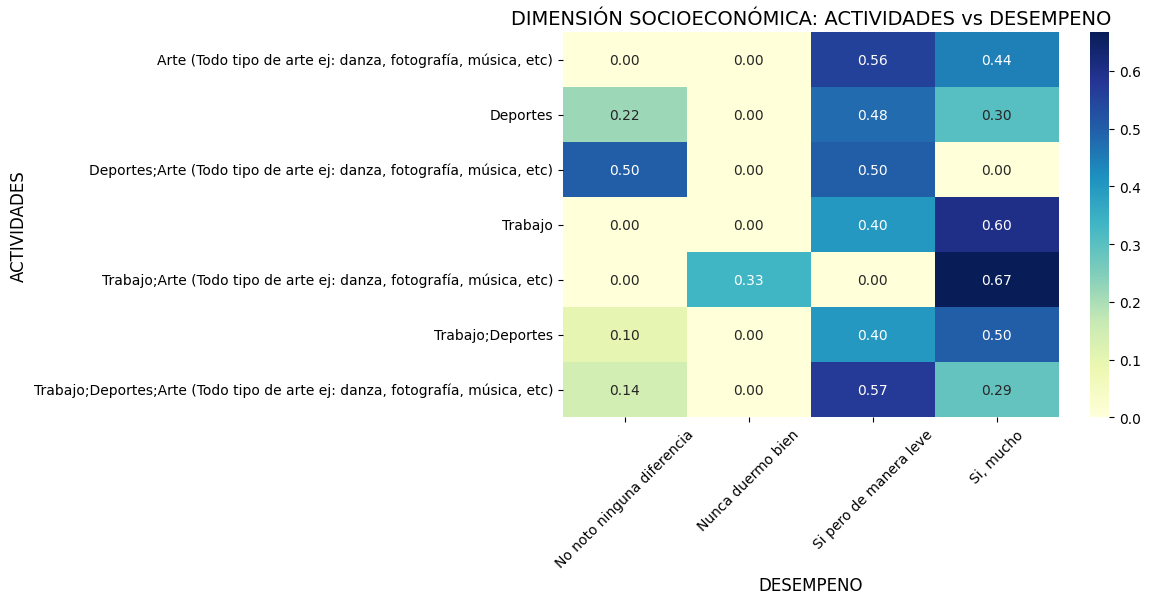

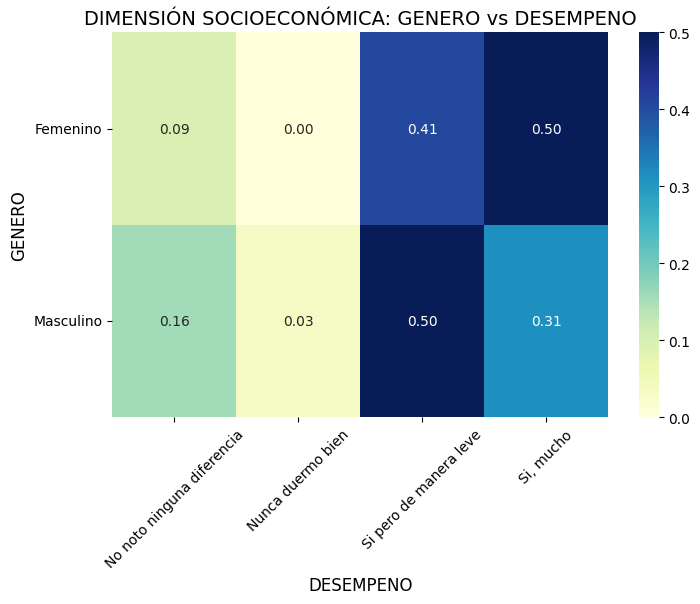

In [7]:
# ANÁLISIS EXPLORATORIO: RELACIONES ENTRE VARIABLES
import matplotlib.pyplot as plt
import seaborn as sns

# Definir variables activas (las que participarán en el MCA)
VARIABLES_ACTIVAS = ['SLEEP', 'CONCENTRACION', 'DESEMPENO', 'PUNTUALIDAD', 'FATIGA', 'CALIDAD']

# Definir variables suplementarias (para interpretación)
VARIABLES_SUPLEMENTARIAS = ['GENERO', 'CARRERA', 'SEMESTRE', 'BECA']

# Re-definir las variables por dimensión con nombres en mayúsculas
ACADEMICAS = ['SEMESTRE', 'CARRERA', 'CREDITOS', 'RETIRO']
PERSONALES = ['HORAS', 'SLEEP', 'CONCENTRACION', 'PUNTUALIDAD', 'FATIGA', 'CALIDAD']
SOCIOECO   = ['BECA', 'DOBLECARRERA', 'ACTIVIDADES', 'GENERO']

# Función para graficar heatmaps de contingencia
def plot_heatmaps(vars_list, target="DESEMPENO", title=""):
    for col in vars_list:
        tabla = pd.crosstab(df[col], df[target], normalize="index")
        plt.figure(figsize=(8,5))
        sns.heatmap(tabla, annot=True, fmt=".2f", cmap="YlGnBu")
        plt.title(f"{title}: {col} vs {target}", fontsize=14)
        plt.ylabel(col, fontsize=12)
        plt.xlabel(target, fontsize=12)
        plt.xticks(rotation=45)
        plt.yticks(rotation=0)
        plt.show()

# Académicas
plot_heatmaps(ACADEMICAS, target="DESEMPENO", title="DIMENSIÓN ACADÉMICA")

# Personales / Bienestar
plot_heatmaps(PERSONALES, target="DESEMPENO", title="DIMENSIÓN PERSONAL / BIENESTAR")

# Socioeconómicas
plot_heatmaps(SOCIOECO, target="DESEMPENO", title="DIMENSIÓN SOCIOECONÓMICA")

In [23]:
# LIMPIEZA Y ESTANDARIZACIÓN DE DATOS
import pandas as pd

# Crear una copia del dataframe para el preprocesamiento
df_mca = df.copy()

# Seleccionar solo las variables activas para el MCA
data_activas = df_mca[VARIABLES_ACTIVAS].copy()

print("=== EXPLORACIÓN DE DATOS FALTANTES ===")

# Verificar valores faltantes para cada variable
datos_faltantes_encontrados = False

for var in VARIABLES_ACTIVAS:
    faltantes = data_activas[var].isnull().sum()
    if faltantes > 0:
        print(f"❌ {var}: {faltantes} datos faltantes encontrados")
        # Reemplazar valores faltantes por 'FALTANTE'
        data_activas[var] = data_activas[var].fillna('FALTANTE')
        print(f"✓ {var}: Reemplazados {faltantes} valores faltantes por 'FALTANTE'")
        datos_faltantes_encontrados = True
    else:
        print(f"✓ {var}: Sin datos faltantes")

if not datos_faltantes_encontrados:
    print("🎉 No se encontraron datos faltantes en ninguna variable activa")

print("\n=== ESTANDARIZACIÓN DE VARIABLES QUE REQUIEREN LIMPIEZA ===")

# CONCENTRACION: Requiere estandarización (simplificar respuestas largas)
print("\n🔧 Estandarizando CONCENTRACION...")
antes = data_activas['CONCENTRACION'].unique()
data_activas['CONCENTRACION'] = data_activas['CONCENTRACION'].replace({
    'Si, siempre': 'Siempre',
    'Si, en la mayoría de ocasiones': 'Mayoría ocasiones', 
    'Solo en días de exámenes o entregas importantes': 'Solo exámenes',
    'No, no he notado la diferencia': 'No nota diferencia'
})
despues = data_activas['CONCENTRACION'].unique()
print(f"✓ CONCENTRACION estandarizada exitosamente")
print(f"  Antes: {len(antes)} categorías → Después: {len(despues)} categorías")

# DESEMPENO: Requiere estandarización (simplificar respuestas)
print("\n🔧 Estandarizando DESEMPENO...")
antes = data_activas['DESEMPENO'].unique()
data_activas['DESEMPENO'] = data_activas['DESEMPENO'].replace({
    'Si, mucho': 'Mucho',
    'Si pero de manera leve': 'Leve',
    'No noto ninguna diferencia': 'No',
    'Nunca duermo bien': 'No'

})
despues = data_activas['DESEMPENO'].unique()
print(f"✓ DESEMPENO estandarizada exitosamente")
print(f"  Antes: {len(antes)} categorías → Después: {len(despues)} categorías")

# FATIGA: Requiere estandarización (simplificar respuestas largas)
print("\n🔧 Estandarizando FATIGA...")
antes = data_activas['FATIGA'].unique()
data_activas['FATIGA'] = data_activas['FATIGA'].replace({
    'No, nunca lo he pensado': 'Nunca',
    'Si, pero nunca lo considere': 'Poco considerado',
    'Si, lo he pensado seriamente': 'Pensado seriamente'
})
despues = data_activas['FATIGA'].unique()
print(f"✓ FATIGA estandarizada exitosamente")
print(f"  Antes: {len(antes)} categorías → Después: {len(despues)} categorías")

# CALIDAD: Requiere estandarización (simplificar respuestas largas)
print("\n🔧 Estandarizando CALIDAD...")
antes = data_activas['CALIDAD'].unique()
data_activas['CALIDAD'] = data_activas['CALIDAD'].replace({
    'Si, de forma constante': 'Constante',
    'Solo en semana de parciales y entregas': 'Solo parciales',
    'No afecta mucho, lo manejo bien': 'Manejo bien',
    'No afecta en lo absoluto': 'No afecta'
})
despues = data_activas['CALIDAD'].unique()
print(f"✓ CALIDAD estandarizada exitosamente")
print(f"  Antes: {len(antes)} categorías → Después: {len(despues)} categorías")

# Variables que NO requieren estandarización
print(f"\n📋 Variables SIN cambios (ya están estandarizadas):")
print(f"✓ SLEEP: Categorías ya claras y consistentes")
print(f"✓ PUNTUALIDAD: Categorías ya claras y consistentes")

print(f"\n=== DATASET FINAL LIMPIO ===")
print(f"📊 Dimensiones: {data_activas.shape[0]} observaciones x {data_activas.shape[1]} variables")
print(f"📝 Variables activas procesadas: {list(data_activas.columns)}")

# Verificación final
print(f"\n🔍 Verificación final - Valores únicos por variable:")
for col in VARIABLES_ACTIVAS:
    print(f"  {col}: {data_activas[col].nunique()} categorías únicas")

# Guardar datos limpios
data_clean_step1 = data_activas.copy()
print(f"\n✅ Datos limpios guardados en 'data_clean_step1' para siguiente paso")
display(data_clean_step1)

=== EXPLORACIÓN DE DATOS FALTANTES ===
✓ SLEEP: Sin datos faltantes
✓ CONCENTRACION: Sin datos faltantes
✓ DESEMPENO: Sin datos faltantes
✓ PUNTUALIDAD: Sin datos faltantes
✓ FATIGA: Sin datos faltantes
✓ CALIDAD: Sin datos faltantes
🎉 No se encontraron datos faltantes en ninguna variable activa

=== ESTANDARIZACIÓN DE VARIABLES QUE REQUIEREN LIMPIEZA ===

🔧 Estandarizando CONCENTRACION...
✓ CONCENTRACION estandarizada exitosamente
  Antes: 4 categorías → Después: 4 categorías

🔧 Estandarizando DESEMPENO...
✓ DESEMPENO estandarizada exitosamente
  Antes: 4 categorías → Después: 3 categorías

🔧 Estandarizando FATIGA...
✓ FATIGA estandarizada exitosamente
  Antes: 3 categorías → Después: 3 categorías

🔧 Estandarizando CALIDAD...
✓ CALIDAD estandarizada exitosamente
  Antes: 4 categorías → Después: 4 categorías

📋 Variables SIN cambios (ya están estandarizadas):
✓ SLEEP: Categorías ya claras y consistentes
✓ PUNTUALIDAD: Categorías ya claras y consistentes

=== DATASET FINAL LIMPIO ===
📊 

,SLEEP,CONCENTRACION,DESEMPENO,PUNTUALIDAD,FATIGA,CALIDAD
0,Frecuentemente,Mayoría ocasiones,Mucho,Rara vez,Poco considerado,Constante
1,Casi nunca,Solo exámenes,Mucho,"Si, varias veces",Pensado seriamente,Manejo bien
2,A veces,Siempre,Mucho,Nunca,Nunca,Constante
3,A veces,Mayoría ocasiones,Mucho,Nunca,Nunca,Solo parciales
4,Casi nunca,Solo exámenes,Leve,"Si, varias veces",Nunca,Solo parciales
5,A veces,Mayoría ocasiones,Mucho,Rara vez,Nunca,Solo parciales
6,Casi nunca,No nota diferencia,Leve,"Si, varias veces",Pensado seriamente,No afecta
7,Casi nunca,No nota diferencia,Mucho,Nunca,Nunca,Manejo bien
8,Frecuentemente,Mayoría ocasiones,Leve,"Si, varias veces",Poco considerado,Constante
9,Frecuentemente,Mayoría ocasiones,Mucho,Rara vez,Nunca,Solo parciales


In [24]:
# ENCODING DE VARIABLES CATEGÓRICAS
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Trabajar con los datos limpios del paso anterior
data_activas = data_clean_step1.copy()

print("=== ANÁLISIS DEL TIPO DE VARIABLES PARA ENCODING ===")

# Clasificación de variables según su naturaleza
print("\n--- VARIABLES ORDINALES (LabelEncoder) ---")
print("SLEEP: Orden natural de frecuencia")
print("CONCENTRACION: Orden de intensidad")  
print("DESEMPENO: Orden de rendimiento")
print("PUNTUALIDAD: Orden de frecuencia")
print("FATIGA: Orden de nivel de consideración")

print("\n--- VARIABLES NOMINALES (OneHotEncoder) ---")
print("CALIDAD: Diferentes contextos sin orden inherente")

print(f"\n=== APLICANDO ENCODING ===")

# Crear DataFrame para datos encodificados
data_encoded = data_activas.copy()

# APLICAR LABEL ENCODING PARA VARIABLES ORDINALES
ordinal_vars = ['SLEEP', 'CONCENTRACION', 'DESEMPENO', 'PUNTUALIDAD', 'FATIGA']

for var in ordinal_vars:
    print(f"\nAplicando LabelEncoder a {var}...")
    
    # Definir orden manual para cada variable ordinal
    if var == 'SLEEP':
        order = ['Nunca', 'Casi nunca', 'A veces', 'Frecuentemente', 'Siempre']
    elif var == 'CONCENTRACION':
        order = ['No nota diferencia', 'Solo exámenes', 'Mayoría ocasiones', 'Siempre']
    elif var == 'DESEMPENO':
        order = ['No', 'Leve', 'Mucho']
    elif var == 'PUNTUALIDAD':
        order = ['Nunca', 'Rara vez', 'Si, varias veces', 'Siempre']
    elif var == 'FATIGA':
        order = ['Nunca', 'Poco considerado', 'Pensado seriamente']
    
    # Crear mapeo ordenado
    order_mapping = {category: i for i, category in enumerate(order)}
    data_encoded[var] = data_activas[var].map(order_mapping)
    
    print(f"✓ Mapeo aplicado: {order_mapping}")

# APLICAR ONE-HOT ENCODING PARA CALIDAD
print(f"\nAplicando OneHotEncoder a CALIDAD...")
dummies = pd.get_dummies(data_activas['CALIDAD'], prefix='CALIDAD')
data_encoded = data_encoded.drop(columns=['CALIDAD'])
data_encoded = pd.concat([data_encoded, dummies], axis=1)
print(f"✓ Variables creadas: {list(dummies.columns)}")

print(f"\n=== RESULTADO FINAL DEL ENCODING ===")
print(f"Dimensiones finales: {data_encoded.shape}")
print(f"Variables finales: {list(data_encoded.columns)}")

# Verificar que no hay valores faltantes tras el encoding
print(f"\nValores faltantes tras encoding: {data_encoded.isnull().sum().sum()}")

# Guardar para siguiente paso
data_for_mca = data_encoded.copy()
print(f"\n✅ Datos encodificados guardados en 'data_for_mca' para el MCA")
display(data_for_mca)

=== ANÁLISIS DEL TIPO DE VARIABLES PARA ENCODING ===

--- VARIABLES ORDINALES (LabelEncoder) ---
SLEEP: Orden natural de frecuencia
CONCENTRACION: Orden de intensidad
DESEMPENO: Orden de rendimiento
PUNTUALIDAD: Orden de frecuencia
FATIGA: Orden de nivel de consideración

--- VARIABLES NOMINALES (OneHotEncoder) ---
CALIDAD: Diferentes contextos sin orden inherente

=== APLICANDO ENCODING ===

Aplicando LabelEncoder a SLEEP...
✓ Mapeo aplicado: {'Nunca': 0, 'Casi nunca': 1, 'A veces': 2, 'Frecuentemente': 3, 'Siempre': 4}

Aplicando LabelEncoder a CONCENTRACION...
✓ Mapeo aplicado: {'No nota diferencia': 0, 'Solo exámenes': 1, 'Mayoría ocasiones': 2, 'Siempre': 3}

Aplicando LabelEncoder a DESEMPENO...
✓ Mapeo aplicado: {'No': 0, 'Leve': 1, 'Mucho': 2}

Aplicando LabelEncoder a PUNTUALIDAD...
✓ Mapeo aplicado: {'Nunca': 0, 'Rara vez': 1, 'Si, varias veces': 2, 'Siempre': 3}

Aplicando LabelEncoder a FATIGA...
✓ Mapeo aplicado: {'Nunca': 0, 'Poco considerado': 1, 'Pensado seriamente': 2}

,SLEEP,CONCENTRACION,DESEMPENO,PUNTUALIDAD,FATIGA,CALIDAD_Constante,CALIDAD_Manejo bien,CALIDAD_No afecta,CALIDAD_Solo parciales
0,3,2,2,1,1,True,False,False,False
1,1,1,2,2,2,False,True,False,False
2,2,3,2,0,0,True,False,False,False
3,2,2,2,0,0,False,False,False,True
4,1,1,1,2,0,False,False,False,True
5,2,2,2,1,0,False,False,False,True
6,1,0,1,2,2,False,False,True,False
7,1,0,2,0,0,False,True,False,False
8,3,2,1,2,1,True,False,False,False
9,3,2,2,1,0,False,False,False,True


In [27]:
# IMPLEMENTACIÓN DEL MCA - CONFIGURACIÓN ESTÁNDAR
from prince import MCA
import numpy as np

print("=== EJECUTANDO ANÁLISIS DE CORRESPONDENCIA MÚLTIPLE ===")

# Usar datos encodificados del paso anterior
data_clean = data_for_mca.dropna()
print(f"📊 Datos para MCA: {data_clean.shape[0]} observaciones x {data_clean.shape[1]} variables")
print(f"📝 Variables incluidas: {list(data_clean.columns)}")

# Configuración estándar del MCA
print("\n🔧 CONFIGURACIÓN DEL MCA:")
print("  • Número de componentes: 5")
print("  • Iteraciones: 3")  
print("  • Motor de cálculo: sklearn")
print("  • Semilla aleatoria: 42 (para reproducibilidad)")

# Crear y configurar el modelo MCA
mca = MCA(
    n_components=5,  # Configuración estándar
    n_iter=3,       # Configuración estándar
    copy=True,
    check_input=True,
    engine='sklearn',
    random_state=42
)

# Ajustar el modelo
print("\n⚙️ Ejecutando MCA...")
mca_result = mca.fit(data_clean)
print("✅ MCA ejecutado exitosamente")

# Análisis de varianza explicada
print("\n=== ANÁLISIS DE VARIANZA EXPLICADA ===")
eigenvalues = mca_result.eigenvalues_

# Verificar qué atributos están disponibles para explained variance
try:
    explained_variance = mca_result.explained_inertia_
    print("📈 Usando explained_inertia_")
except AttributeError:
    try:
        explained_variance = mca_result.explained_variance_ratio_
        print("📈 Usando explained_variance_ratio_")
    except AttributeError:
        # Calcular manualmente la varianza explicada
        total_inertia = np.sum(eigenvalues)
        explained_variance = eigenvalues / total_inertia
        print("📈 Calculando varianza explicada manualmente")

print("📈 Detalle por componente:")
for i, (eigenval, var_exp) in enumerate(zip(eigenvalues, explained_variance)):
    significance = "🔥" if eigenval > 0.2 else "⚡" if eigenval > 0.1 else "📊"
    print(f"  Componente {i+1}: Eigenvalue = {eigenval:.4f} | Varianza = {var_exp:.2%} {significance}")

# Varianza acumulada
cumulative_2 = sum(explained_variance[:2])
cumulative_3 = sum(explained_variance[:3])
cumulative_4 = sum(explained_variance[:4])

print(f"\n📊 VARIANZA ACUMULADA:")
print(f"  Primeros 2 componentes: {cumulative_2:.2%}")
print(f"  Primeros 3 componentes: {cumulative_3:.2%}")
print(f"  Primeros 4 componentes: {cumulative_4:.2%}")

# Criterio de retención
print(f"\n💡 CRITERIO DE RETENCIÓN:")
if cumulative_2 >= 0.60:
    recommended = 2
    print(f"✅ Recomendado: 2 componentes (explican {cumulative_2:.1%} de varianza)")
elif cumulative_3 >= 0.70:
    recommended = 3  
    print(f"✅ Recomendado: 3 componentes (explican {cumulative_3:.1%} de varianza)")
else:
    recommended = 4
    print(f"⚠️ Recomendado: 4+ componentes (solo {cumulative_3:.1%} con 3 componentes)")

print(f"\n🎯 RESULTADO: MCA completado. Usaremos principalmente los primeros {recommended} componentes para análisis.")

=== EJECUTANDO ANÁLISIS DE CORRESPONDENCIA MÚLTIPLE ===
📊 Datos para MCA: 64 observaciones x 9 variables
📝 Variables incluidas: ['SLEEP', 'CONCENTRACION', 'DESEMPENO', 'PUNTUALIDAD', 'FATIGA', 'CALIDAD_Constante', 'CALIDAD_Manejo bien', 'CALIDAD_No afecta', 'CALIDAD_Solo parciales']

🔧 CONFIGURACIÓN DEL MCA:
  • Número de componentes: 5
  • Iteraciones: 3
  • Motor de cálculo: sklearn
  • Semilla aleatoria: 42 (para reproducibilidad)

⚙️ Ejecutando MCA...
✅ MCA ejecutado exitosamente

=== ANÁLISIS DE VARIANZA EXPLICADA ===
📈 Calculando varianza explicada manualmente
📈 Detalle por componente:
  Componente 1: Eigenvalue = 0.2523 | Varianza = 25.35% 🔥
  Componente 2: Eigenvalue = 0.2443 | Varianza = 24.56% 🔥
  Componente 3: Eigenvalue = 0.1813 | Varianza = 18.22% ⚡
  Componente 4: Eigenvalue = 0.1721 | Varianza = 17.29% ⚡
  Componente 5: Eigenvalue = 0.1451 | Varianza = 14.58% ⚡

📊 VARIANZA ACUMULADA:
  Primeros 2 componentes: 49.91%
  Primeros 3 componentes: 68.13%
  Primeros 4 component

=== VISUALIZACIÓN 3D DE INDIVIDUOS ===
📊 Proyectando 5 estudiantes en espacio 3D
🎯 Dimensiones: 1 (25.4%), 2 (24.6%), 3 (18.2%)


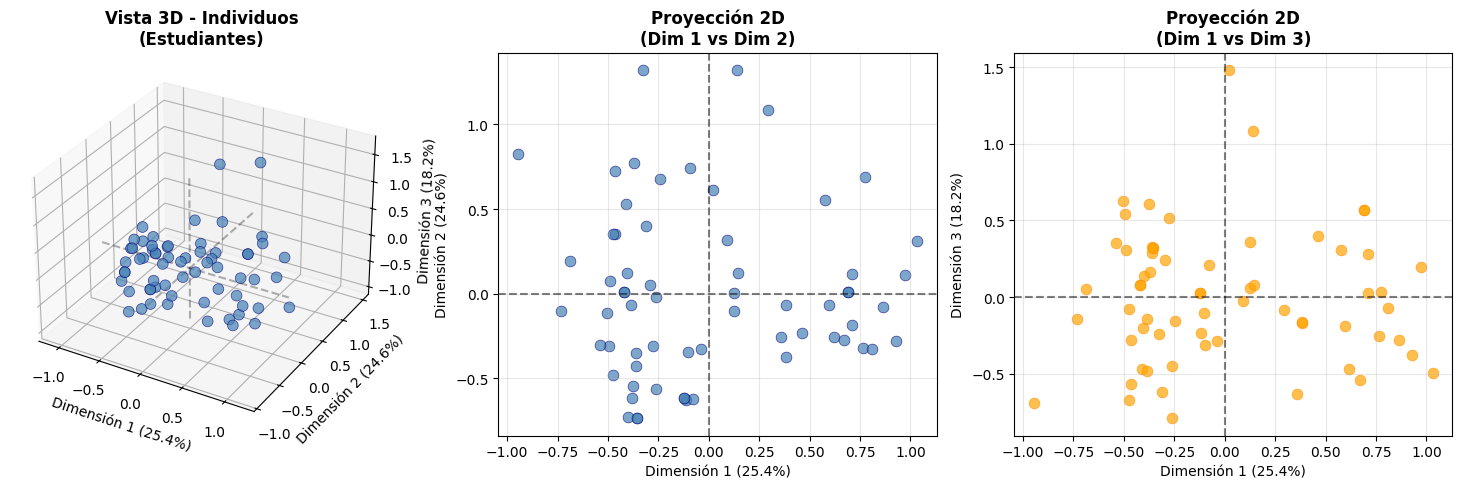


📈 INTERPRETACIÓN VISUAL:
🔍 La vista 3D muestra la distribución de estudiantes en el espacio factorial
📊 Las proyecciones 2D permiten analizar relaciones específicas entre dimensiones
🎯 Busca agrupaciones naturales o patrones de dispersión

📊 ESTADÍSTICAS DE DISPERSIÓN:
  Dimensión 1: Desv.Est = 0.502 | Rango = 1.975
  Dimensión 2: Desv.Est = 0.494 | Rango = 2.058
  Dimensión 3: Desv.Est = 0.426 | Rango = 2.274

✅ Coordenadas guardadas para análisis posteriores


In [28]:
# VISUALIZACIÓN 3D DE INDIVIDUOS (ESTUDIANTES)
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

print("=== VISUALIZACIÓN 3D DE INDIVIDUOS ===")

# Obtener coordenadas de individuos en las primeras 3 dimensiones
coord_individuos = mca_result.row_coordinates(data_clean)

print(f"📊 Proyectando {coord_individuos.shape[1]} estudiantes en espacio 3D")
print(f"🎯 Dimensiones: 1 ({explained_variance[0]:.1%}), 2 ({explained_variance[1]:.1%}), 3 ({explained_variance[2]:.1%})")

# Crear figura 3D
fig = plt.figure(figsize=(15, 5))

# ===== GRÁFICO 1: VISTA GENERAL 3D =====
ax1 = fig.add_subplot(131, projection='3d')

scatter = ax1.scatter(coord_individuos[0], coord_individuos[1], coord_individuos[2], 
                     alpha=0.7, s=60, c='steelblue', edgecolors='navy', linewidth=0.5)

ax1.set_xlabel(f'Dimensión 1 ({explained_variance[0]:.1%})', fontsize=10)
ax1.set_ylabel(f'Dimensión 2 ({explained_variance[1]:.1%})', fontsize=10)
ax1.set_zlabel(f'Dimensión 3 ({explained_variance[2]:.1%})', fontsize=10)
ax1.set_title('Vista 3D - Individuos\n(Estudiantes)', fontsize=12, fontweight='bold')

# Agregar líneas de referencia
ax1.plot([0, 0], [0, 0], [ax1.get_zlim()[0], ax1.get_zlim()[1]], 'k--', alpha=0.3)
ax1.plot([ax1.get_xlim()[0], ax1.get_xlim()[1]], [0, 0], [0, 0], 'k--', alpha=0.3)
ax1.plot([0, 0], [ax1.get_ylim()[0], ax1.get_ylim()[1]], [0, 0], 'k--', alpha=0.3)

# ===== GRÁFICO 2: PROYECCIÓN DIM1 vs DIM2 =====
ax2 = fig.add_subplot(132)

ax2.scatter(coord_individuos[0], coord_individuos[1], alpha=0.7, s=60, 
           c='steelblue', edgecolors='navy', linewidth=0.5)

ax2.set_xlabel(f'Dimensión 1 ({explained_variance[0]:.1%})', fontsize=10)
ax2.set_ylabel(f'Dimensión 2 ({explained_variance[1]:.1%})', fontsize=10)
ax2.set_title('Proyección 2D\n(Dim 1 vs Dim 2)', fontsize=12, fontweight='bold')
ax2.grid(True, alpha=0.3)
ax2.axhline(y=0, color='k', linestyle='--', alpha=0.5)
ax2.axvline(x=0, color='k', linestyle='--', alpha=0.5)

# ===== GRÁFICO 3: PROYECCIÓN DIM1 vs DIM3 =====
ax3 = fig.add_subplot(133)

ax3.scatter(coord_individuos[0], coord_individuos[2], alpha=0.7, s=60, 
           c='orange', edgecolors='darkorange', linewidth=0.5)

ax3.set_xlabel(f'Dimensión 1 ({explained_variance[0]:.1%})', fontsize=10)
ax3.set_ylabel(f'Dimensión 3 ({explained_variance[2]:.1%})', fontsize=10)
ax3.set_title('Proyección 2D\n(Dim 1 vs Dim 3)', fontsize=12, fontweight='bold')
ax3.grid(True, alpha=0.3)
ax3.axhline(y=0, color='k', linestyle='--', alpha=0.5)
ax3.axvline(x=0, color='k', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

print("\n📈 INTERPRETACIÓN VISUAL:")
print("🔍 La vista 3D muestra la distribución de estudiantes en el espacio factorial")
print("📊 Las proyecciones 2D permiten analizar relaciones específicas entre dimensiones")
print("🎯 Busca agrupaciones naturales o patrones de dispersión")

# Estadísticas de dispersión
print(f"\n📊 ESTADÍSTICAS DE DISPERSIÓN:")
for i in range(3):
    std_dev = np.std(coord_individuos[i])
    rango = np.max(coord_individuos[i]) - np.min(coord_individuos[i])
    print(f"  Dimensión {i+1}: Desv.Est = {std_dev:.3f} | Rango = {rango:.3f}")

print(f"\n✅ Coordenadas guardadas para análisis posteriores")

=== BIPLOT BÁSICO DE CATEGORÍAS ===
📊 Proyectando 25 categorías de variables
🎯 Variables incluidas: ['SLEEP', 'CONCENTRACION', 'DESEMPENO', 'PUNTUALIDAD', 'FATIGA', 'CALIDAD_Constante', 'CALIDAD_Manejo bien', 'CALIDAD_No afecta', 'CALIDAD_Solo parciales']


C:\Users\limao\AppData\Local\Temp\ipykernel_34552\4031058733.py:34: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax1.annotate(label, (coord_categorias[0][i], coord_categorias[1][i]),
C:\Users\limao\AppData\Local\Temp\ipykernel_34552\4031058733.py:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax2.annotate(label, (coord_categorias[0][i], coord_categorias[2][i]),


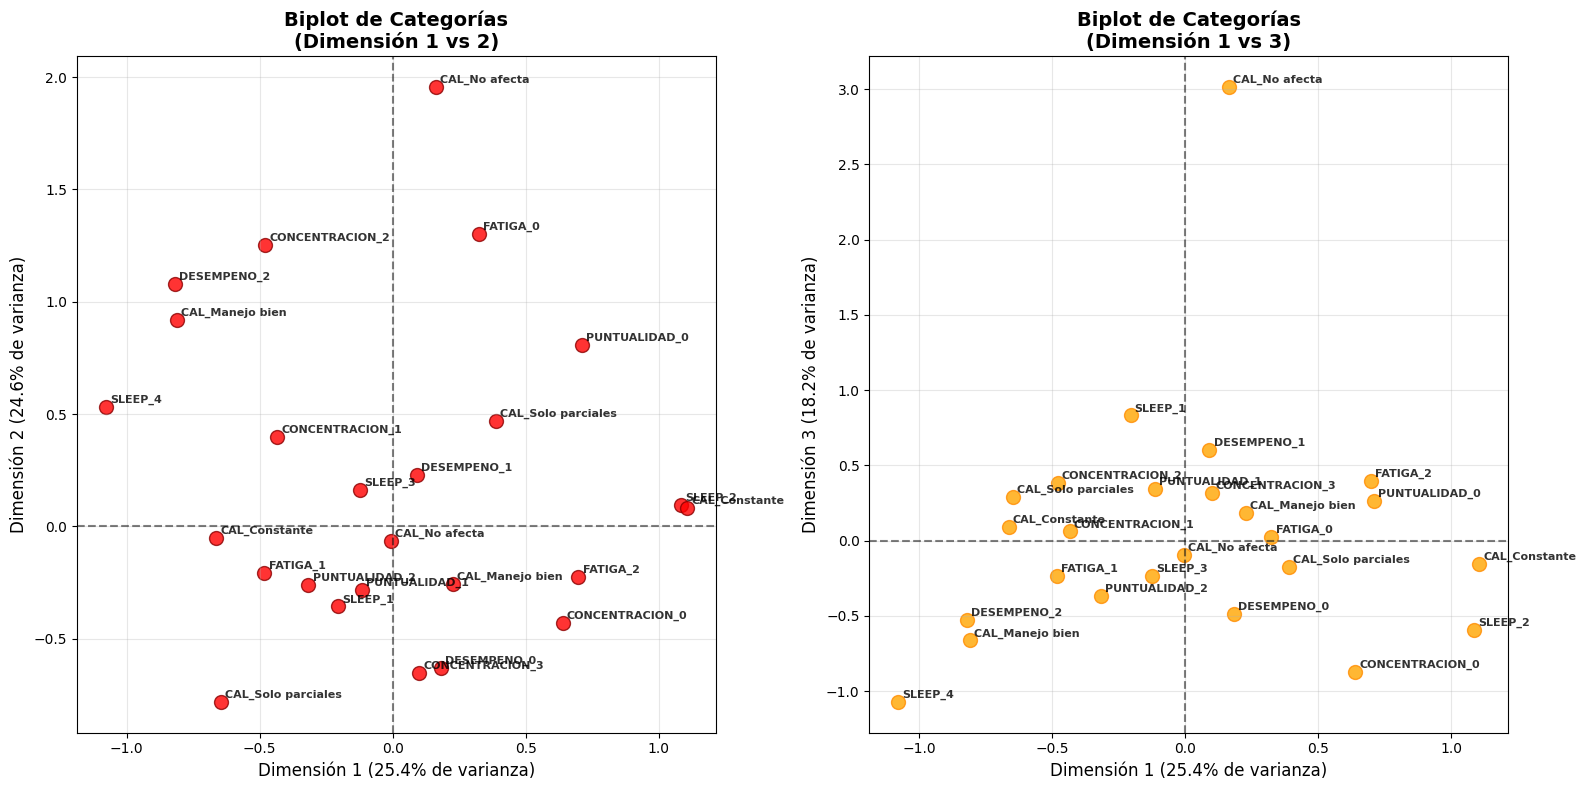


📈 INTERPRETACIÓN DEL BIPLOT:
🔍 Puntos cercanos = categorías con patrones similares
📊 Distancia del origen = importancia en la dimensión
🎯 Posición relativa = asociación entre categorías

📊 ANÁLISIS DE POSICIONES EXTREMAS:

--- DIMENSIÓN 1 ---
  Más positivas:
    CAL_Constante: 1.107
    SLEEP_2: 1.086
    PUNTUALIDAD_0: 0.711
  Más negativas:
    SLEEP_4: -1.079
    DESEMPENO_2: -0.820
    CAL_Manejo bien: -0.810

--- DIMENSIÓN 2 ---
  Más positivas:
    CAL_No afecta: 1.958
    FATIGA_0: 1.303
    CONCENTRACION_2: 1.252
  Más negativas:
    CAL_Solo parciales: -0.782
    CONCENTRACION_3: -0.651
    DESEMPENO_0: -0.631

✅ Biplot de categorías completado


C:\Users\limao\AppData\Local\Temp\ipykernel_34552\4031058733.py:79: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  for idx in reversed(indices_pos):
C:\Users\limao\AppData\Local\Temp\ipykernel_34552\4031058733.py:80: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"    {categories_names[idx]}: {coord_categorias[dim][idx]:.3f}")
C:\Users\limao\AppData\Local\Temp\ipykernel_34552\4031058733.py:86: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.i

In [29]:
# BIPLOT BÁSICO DE CATEGORÍAS
import matplotlib.pyplot as plt
import seaborn as sns

print("=== BIPLOT BÁSICO DE CATEGORÍAS ===")

# Obtener coordenadas de categorías
coord_categorias = mca_result.column_coordinates(data_clean)

# Crear nombres de categorías
categories_names = []
for col in data_clean.columns:
    for cat in data_clean[col].unique():
        if col.startswith('CALIDAD_'):
            # Para variables dummy de CALIDAD, usar nombre más claro
            cat_name = col.replace('CALIDAD_', 'CAL_')
        else:
            # Para variables ordinales, mostrar variable y valor
            cat_name = f"{col}_{cat}"
        categories_names.append(cat_name)

print(f"📊 Proyectando {len(categories_names)} categorías de variables")
print(f"🎯 Variables incluidas: {list(data_clean.columns)}")

# Crear figura con subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

# ===== GRÁFICO 1: BIPLOT DIMENSIÓN 1 vs 2 =====
scatter1 = ax1.scatter(coord_categorias[0], coord_categorias[1], 
                      alpha=0.8, s=100, c='red', edgecolors='darkred', linewidth=1)

# Agregar etiquetas a las categorías
for i, label in enumerate(categories_names):
    ax1.annotate(label, (coord_categorias[0][i], coord_categorias[1][i]), 
                xytext=(3, 3), textcoords='offset points', 
                fontsize=8, alpha=0.8, fontweight='bold')

ax1.set_xlabel(f'Dimensión 1 ({explained_variance[0]:.1%} de varianza)', fontsize=12)
ax1.set_ylabel(f'Dimensión 2 ({explained_variance[1]:.1%} de varianza)', fontsize=12)
ax1.set_title('Biplot de Categorías\n(Dimensión 1 vs 2)', fontsize=14, fontweight='bold')
ax1.grid(True, alpha=0.3)
ax1.axhline(y=0, color='k', linestyle='--', alpha=0.5)
ax1.axvline(x=0, color='k', linestyle='--', alpha=0.5)

# ===== GRÁFICO 2: BIPLOT DIMENSIÓN 1 vs 3 =====
scatter2 = ax2.scatter(coord_categorias[0], coord_categorias[2], 
                      alpha=0.8, s=100, c='orange', edgecolors='darkorange', linewidth=1)

# Agregar etiquetas a las categorías
for i, label in enumerate(categories_names):
    ax2.annotate(label, (coord_categorias[0][i], coord_categorias[2][i]), 
                xytext=(3, 3), textcoords='offset points', 
                fontsize=8, alpha=0.8, fontweight='bold')

ax2.set_xlabel(f'Dimensión 1 ({explained_variance[0]:.1%} de varianza)', fontsize=12)
ax2.set_ylabel(f'Dimensión 3 ({explained_variance[2]:.1%} de varianza)', fontsize=12)
ax2.set_title('Biplot de Categorías\n(Dimensión 1 vs 3)', fontsize=14, fontweight='bold')
ax2.grid(True, alpha=0.3)
ax2.axhline(y=0, color='k', linestyle='--', alpha=0.5)
ax2.axvline(x=0, color='k', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

print("\n📈 INTERPRETACIÓN DEL BIPLOT:")
print("🔍 Puntos cercanos = categorías con patrones similares")
print("📊 Distancia del origen = importancia en la dimensión")
print("🎯 Posición relativa = asociación entre categorías")

# Análisis de posiciones extremas
print(f"\n📊 ANÁLISIS DE POSICIONES EXTREMAS:")

for dim in range(2):
    print(f"\n--- DIMENSIÓN {dim+1} ---")
    
    # Categorías más positivas
    indices_pos = np.argsort(coord_categorias[dim])[-3:]
    print(f"  Más positivas:")
    for idx in reversed(indices_pos):
        print(f"    {categories_names[idx]}: {coord_categorias[dim][idx]:.3f}")
    
    # Categorías más negativas  
    indices_neg = np.argsort(coord_categorias[dim])[:3]
    print(f"  Más negativas:")
    for idx in indices_neg:
        print(f"    {categories_names[idx]}: {coord_categorias[dim][idx]:.3f}")

print(f"\n✅ Biplot de categorías completado")

=== ANÁLISIS DE CONTRIBUCIONES DE CATEGORÍAS ===
📊 Analizando contribuciones de 25 categorías
🎯 A las primeras 25 dimensiones

=== ANÁLISIS NUMÉRICO ===

--- DIMENSIÓN 1 (Varianza: 25.35%) ---
  Top 5 contribuyentes:
    SLEEP_3: nan (nan%)
    SLEEP_1: nan (nan%)
    SLEEP_2: nan (nan%)
    SLEEP_4: nan (nan%)
    CONCENTRACION_2: nan (nan%)
  Contribución acumulada (Top 5): 0.0000 (0.0%)

--- DIMENSIÓN 2 (Varianza: 24.56%) ---
  Top 5 contribuyentes:
    SLEEP_3: nan (nan%)
    SLEEP_1: nan (nan%)
    SLEEP_2: nan (nan%)
    SLEEP_4: nan (nan%)
    CONCENTRACION_2: nan (nan%)
  Contribución acumulada (Top 5): 0.0000 (0.0%)

--- DIMENSIÓN 3 (Varianza: 18.22%) ---
  Top 5 contribuyentes:
    SLEEP_3: nan (nan%)
    SLEEP_1: nan (nan%)
    SLEEP_2: nan (nan%)
    SLEEP_4: nan (nan%)
    CONCENTRACION_2: nan (nan%)
  Contribución acumulada (Top 5): 0.0000 (0.0%)

=== VISUALIZACIÓN DE CONTRIBUCIONES ===


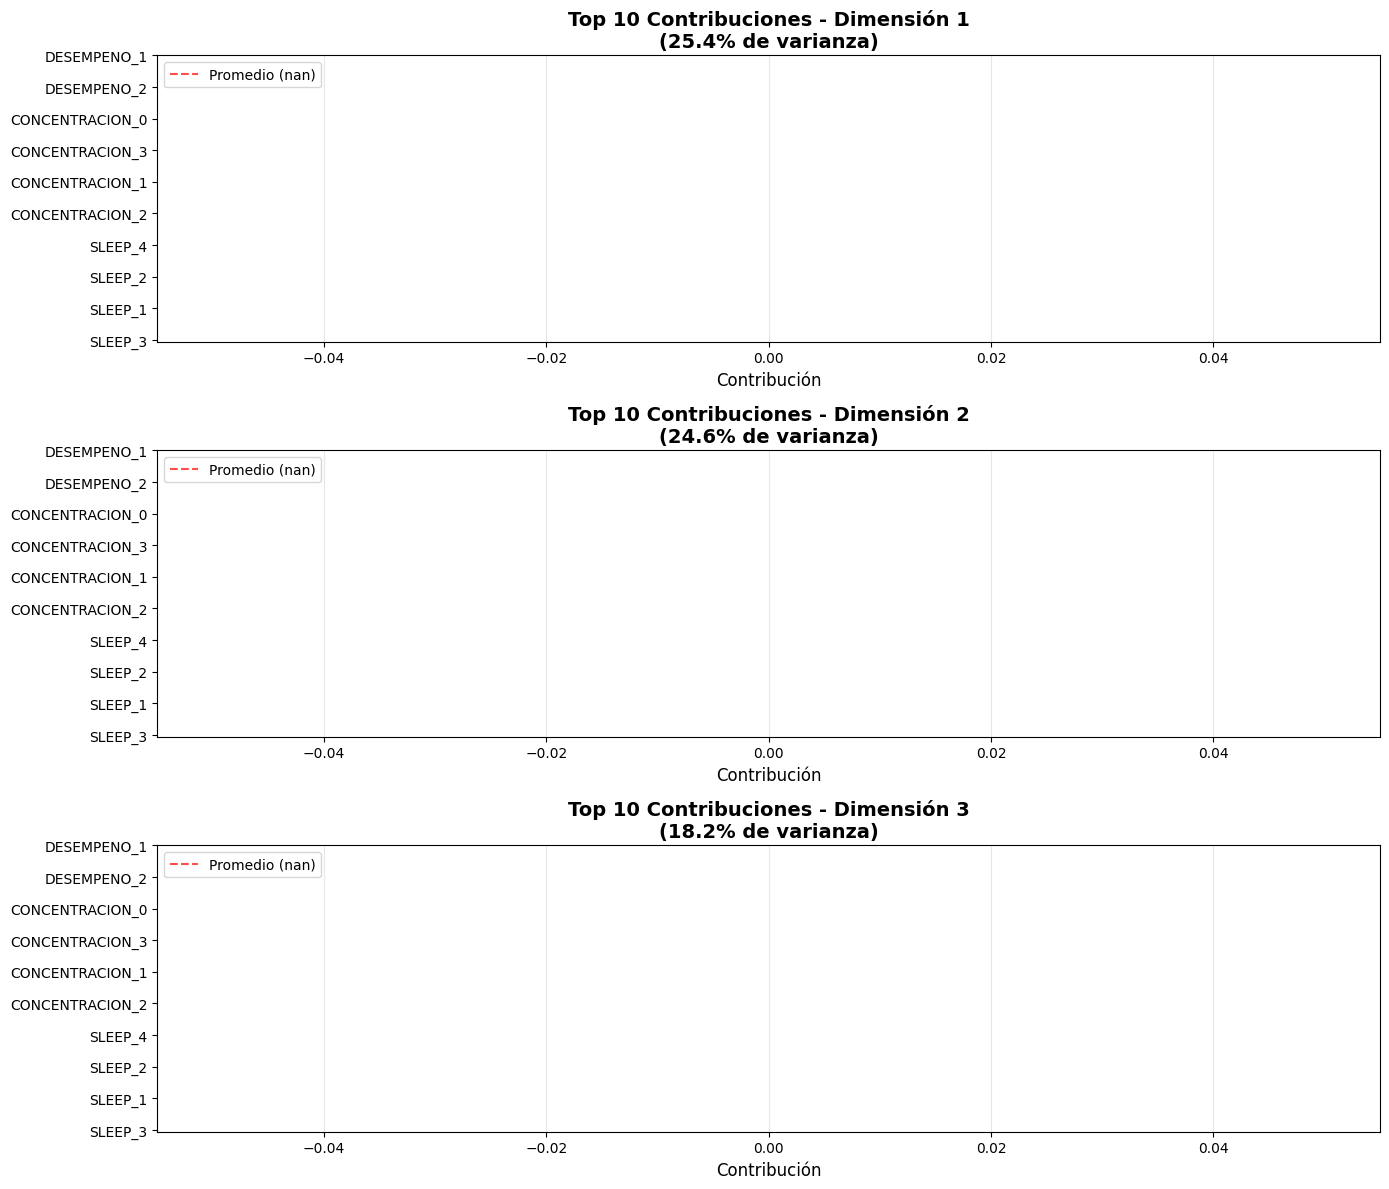


=== TABLA RESUMEN - TOP CONTRIBUYENTES ===
 Dimensión  Ranking Categoría Contribución Porcentaje
         1        1   SLEEP_3          nan       nan%
         1        2   SLEEP_1          nan       nan%
         1        3   SLEEP_2          nan       nan%
         2        1   SLEEP_3          nan       nan%
         2        2   SLEEP_1          nan       nan%
         2        3   SLEEP_2          nan       nan%
         3        1   SLEEP_3          nan       nan%
         3        2   SLEEP_1          nan       nan%
         3        3   SLEEP_2          nan       nan%

💡 INTERPRETACIÓN:
📈 Las categorías con mayor contribución definen el significado de cada dimensión
🎯 Contribución > promedio indica relevancia especial para esa dimensión
📊 Suma de contribuciones por dimensión = 1.000 (100%)

✅ Análisis de contribuciones completado


In [30]:
# ANÁLISIS NUMÉRICO Y VISUAL DE CONTRIBUCIONES
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

print("=== ANÁLISIS DE CONTRIBUCIONES DE CATEGORÍAS ===")

# Obtener contribuciones de las categorías a cada dimensión
contributions = mca_result.column_contributions_

print(f"📊 Analizando contribuciones de {len(categories_names)} categorías")
print(f"🎯 A las primeras {contributions.shape[0]} dimensiones")

# Crear DataFrame para mejor manejo
contrib_df = pd.DataFrame(
    contributions.T,
    columns=[f'Dim_{i+1}' for i in range(contributions.shape[0])],
    index=categories_names
)

print(f"\n=== ANÁLISIS NUMÉRICO ===")

# Análisis por dimensión
for dim in range(min(3, contributions.shape[0])):
    dim_name = f'Dim_{dim+1}'
    print(f"\n--- DIMENSIÓN {dim+1} (Varianza: {explained_variance[dim]:.2%}) ---")
    
    # Top 5 categorías que más contribuyen
    top_contrib = contrib_df[dim_name].sort_values(ascending=False).head(5)
    print(f"  Top 5 contribuyentes:")
    for cat, contrib in top_contrib.items():
        print(f"    {cat}: {contrib:.4f} ({contrib*100:.2f}%)")
    
    # Contribución acumulada del top 5
    top5_sum = top_contrib.sum()
    print(f"  Contribución acumulada (Top 5): {top5_sum:.4f} ({top5_sum*100:.1f}%)")

# Crear visualización de contribuciones
print(f"\n=== VISUALIZACIÓN DE CONTRIBUCIONES ===")

# Configurar el número de subplots basado en dimensiones disponibles
n_dims = min(3, contributions.shape[0])
fig, axes = plt.subplots(n_dims, 1, figsize=(14, 4*n_dims))

# Si solo hay una dimensión, asegurar que axes sea una lista
if n_dims == 1:
    axes = [axes]

for dim in range(n_dims):
    ax = axes[dim]
    dim_name = f'Dim_{dim+1}'
    
    # Top 10 contribuciones para esta dimensión
    top_contrib_viz = contrib_df[dim_name].sort_values(ascending=False).head(10)
    
    # Crear gráfico de barras horizontales
    colors = plt.cm.Set3(np.linspace(0, 1, len(top_contrib_viz)))
    bars = ax.barh(range(len(top_contrib_viz)), top_contrib_viz.values, color=colors)
    
    # Configurar etiquetas y título
    ax.set_yticks(range(len(top_contrib_viz)))
    ax.set_yticklabels(top_contrib_viz.index, fontsize=10)
    ax.set_xlabel('Contribución', fontsize=12)
    ax.set_title(f'Top 10 Contribuciones - Dimensión {dim+1}\n({explained_variance[dim]:.1%} de varianza)', 
                fontsize=14, fontweight='bold')
    
    # Agregar valores en las barras
    for i, (bar, value) in enumerate(zip(bars, top_contrib_viz.values)):
        ax.text(value + 0.001, i, f'{value:.3f}', 
               va='center', ha='left', fontsize=9, fontweight='bold')
    
    # Añadir línea de referencia (contribución promedio)
    avg_contrib = contrib_df[dim_name].mean()
    ax.axvline(avg_contrib, color='red', linestyle='--', alpha=0.7, 
              label=f'Promedio ({avg_contrib:.3f})')
    ax.legend()
    
    ax.grid(True, alpha=0.3, axis='x')

plt.tight_layout()
plt.show()

# Tabla resumen de contribuciones principales
print(f"\n=== TABLA RESUMEN - TOP CONTRIBUYENTES ===")

# Crear tabla resumen con top 3 por dimensión
summary_data = []
for dim in range(min(3, contributions.shape[0])):
    dim_name = f'Dim_{dim+1}'
    top3 = contrib_df[dim_name].sort_values(ascending=False).head(3)
    
    for rank, (cat, contrib) in enumerate(top3.items(), 1):
        summary_data.append({
            'Dimensión': dim+1,
            'Ranking': rank,
            'Categoría': cat,
            'Contribución': f'{contrib:.4f}',
            'Porcentaje': f'{contrib*100:.2f}%'
        })

summary_df = pd.DataFrame(summary_data)
print(summary_df.to_string(index=False))

print(f"\n💡 INTERPRETACIÓN:")
print(f"📈 Las categorías con mayor contribución definen el significado de cada dimensión")
print(f"🎯 Contribución > promedio indica relevancia especial para esa dimensión")
print(f"📊 Suma de contribuciones por dimensión = 1.000 (100%)")

print(f"\n✅ Análisis de contribuciones completado")

=== ANÁLISIS DE VARIABLES SUPLEMENTARIAS ===
📊 Variables suplementarias: ['GENERO', 'CARRERA', 'SEMESTRE', 'BECA']
🎯 Individuos analizados: 64

=== CATEGORÍAS POR VARIABLE SUPLEMENTARIA ===
  GENERO: 2 categorías → ['Femenino', 'Masculino']
  CARRERA: 21 categorías → ['Administration de negocios internacionales', 'Administración de mercadeo y logística internacionales', 'Ingeniería Química', 'Ingeniería Industrial', 'Ingeniería Mecánica', 'Economia y finanzas internacionales', 'Medicina', 'Ingenieria de Bioproducción', 'Derecho', 'Ingenieria Civil', 'Ciencias politicas', 'Comunicación social y periodismo', 'Comunicación corporativa', 'Ingenieria informática', 'Administración de empresas', 'Administración y servicio', 'Comunicación audiovisual y multimedios', 'Gastronomia', 'Filosofia', 'Ciencia de Datos', 'Comportamiento organizacional']
  SEMESTRE: 8 categorías → [np.int64(2), np.int64(4), np.int64(5), np.int64(3), np.int64(8), np.int64(6), np.int64(7), np.int64(1)]
  BECA: 2 categorí

C:\Users\limao\AppData\Local\Temp\ipykernel_34552\3368981541.py:34: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap(color_palettes[idx])(np.linspace(0, 1, len(categories)))



--- Procesando SEMESTRE ---
  2: n=10, Centroide=(0.265, -0.088)
  4: n=9, Centroide=(-0.020, -0.016)
  5: n=13, Centroide=(-0.101, 0.182)
  3: n=10, Centroide=(0.231, 0.153)
  8: n=4, Centroide=(-0.033, 0.045)
  6: n=9, Centroide=(-0.064, -0.283)
  7: n=4, Centroide=(-0.375, 0.072)
  1: n=5, Centroide=(-0.252, -0.159)

--- Procesando BECA ---
  No: n=25, Centroide=(0.004, 0.057)
  Si: n=39, Centroide=(-0.002, -0.036)


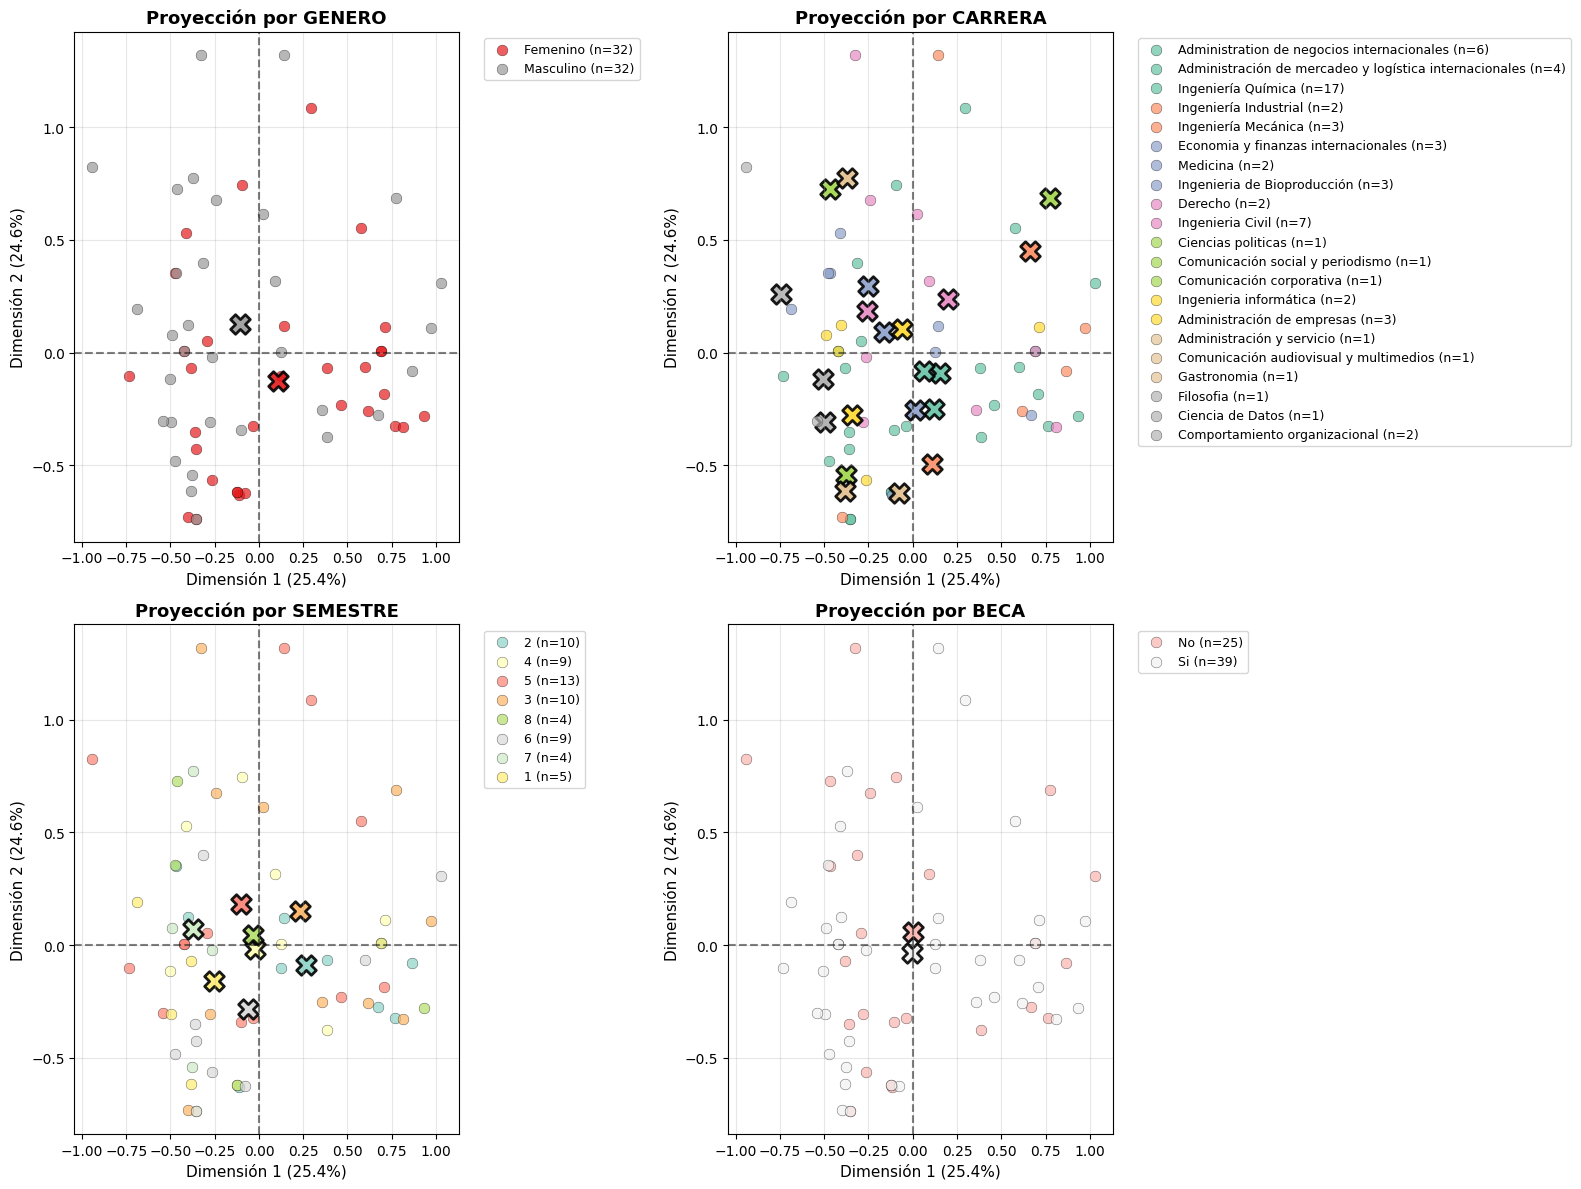


=== ANÁLISIS ESTADÍSTICO DE CENTROIDES ===

--- CENTROIDES PARA GENERO ---
  Femenino:
    N = 32
    Dim1 = 0.109
    Dim2 = -0.127
    Dim3 = -0.004
    Distancia al origen = 0.167
  Masculino:
    N = 32
    Dim1 = -0.109
    Dim2 = 0.127
    Dim3 = 0.004
    Distancia al origen = 0.167

--- CENTROIDES PARA CARRERA ---
  Administration de negocios internacionales:
    N = 6
    Dim1 = 0.122
    Dim2 = -0.252
    Dim3 = -0.184
    Distancia al origen = 0.280
  Administración de mercadeo y logística internacionales:
    N = 4
    Dim1 = 0.155
    Dim2 = -0.090
    Dim3 = 0.101
    Distancia al origen = 0.179
  Ingeniería Química:
    N = 17
    Dim1 = 0.063
    Dim2 = -0.083
    Dim3 = -0.024
    Distancia al origen = 0.104
  Ingeniería Industrial:
    N = 2
    Dim1 = 0.109
    Dim2 = -0.495
    Dim3 = -0.166
    Distancia al origen = 0.507
  Ingeniería Mecánica:
    N = 3
    Dim1 = 0.660
    Dim2 = 0.449
    Dim3 = 0.333
    Distancia al origen = 0.799
  Economia y finanzas intern

In [31]:
# ANÁLISIS DE VARIABLES SUPLEMENTARIAS
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

print("=== ANÁLISIS DE VARIABLES SUPLEMENTARIAS ===")

# Obtener datos de variables suplementarias (sin valores faltantes)
data_suplementarias = df.loc[data_clean.index, VARIABLES_SUPLEMENTARIAS].copy()

print(f"📊 Variables suplementarias: {VARIABLES_SUPLEMENTARIAS}")
print(f"🎯 Individuos analizados: {len(data_suplementarias)}")

# Verificar y mostrar categorías de cada variable suplementaria
print(f"\n=== CATEGORÍAS POR VARIABLE SUPLEMENTARIA ===")
for var in VARIABLES_SUPLEMENTARIAS:
    unique_vals = data_suplementarias[var].unique()
    print(f"  {var}: {len(unique_vals)} categorías → {list(unique_vals)}")

# Crear visualización con proyección de variables suplementarias
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.ravel()

# Paleta de colores para cada variable
color_palettes = ['Set1', 'Set2', 'Set3', 'Pastel1']

for idx, var_sup in enumerate(VARIABLES_SUPLEMENTARIAS):
    ax = axes[idx]
    
    # Obtener categorías únicas de la variable suplementaria
    categories = data_suplementarias[var_sup].unique()
    
    # Asignar colores
    colors = plt.cm.get_cmap(color_palettes[idx])(np.linspace(0, 1, len(categories)))
    
    print(f"\n--- Procesando {var_sup} ---")
    
    # Plotear individuos coloreados por la variable suplementaria
    for i, cat in enumerate(categories):
        mask = data_suplementarias[var_sup] == cat
        n_obs = mask.sum()
        
        if n_obs > 0:  # Solo si hay observaciones
            ax.scatter(coord_individuos[0][mask], coord_individuos[1][mask], 
                      label=f'{cat} (n={n_obs})', alpha=0.7, s=60, 
                      color=colors[i], edgecolors='black', linewidth=0.3)
            
            # Calcular y mostrar centroide
            centroid_x = coord_individuos[0][mask].mean()
            centroid_y = coord_individuos[1][mask].mean()
            
            # Marcar centroide
            ax.scatter(centroid_x, centroid_y, marker='X', s=200, 
                      color=colors[i], edgecolors='black', linewidth=2,
                      alpha=0.9)
            
            print(f"  {cat}: n={n_obs}, Centroide=({centroid_x:.3f}, {centroid_y:.3f})")
    
    ax.set_xlabel(f'Dimensión 1 ({explained_variance[0]:.1%})', fontsize=11)
    ax.set_ylabel(f'Dimensión 2 ({explained_variance[1]:.1%})', fontsize=11)
    ax.set_title(f'Proyección por {var_sup}', fontsize=13, fontweight='bold')
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=9)
    ax.grid(True, alpha=0.3)
    ax.axhline(y=0, color='k', linestyle='--', alpha=0.5)
    ax.axvline(x=0, color='k', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

# Análisis estadístico de centroides
print(f"\n=== ANÁLISIS ESTADÍSTICO DE CENTROIDES ===")

centroids_data = []
for var_sup in VARIABLES_SUPLEMENTARIAS:
    print(f"\n--- CENTROIDES PARA {var_sup} ---")
    
    categories = data_suplementarias[var_sup].unique()
    
    for cat in categories:
        mask = data_suplementarias[var_sup] == cat
        if mask.sum() > 0:
            centroid_dim1 = coord_individuos[0][mask].mean()
            centroid_dim2 = coord_individuos[1][mask].mean()
            centroid_dim3 = coord_individuos[2][mask].mean()
            n_obs = mask.sum()
            
            centroids_data.append({
                'Variable': var_sup,
                'Categoría': cat,
                'N': n_obs,
                'Dim1': centroid_dim1,
                'Dim2': centroid_dim2,
                'Dim3': centroid_dim3,
                'Distancia_Origen': np.sqrt(centroid_dim1**2 + centroid_dim2**2)
            })
            
            print(f"  {cat}:")
            print(f"    N = {n_obs}")
            print(f"    Dim1 = {centroid_dim1:.3f}")
            print(f"    Dim2 = {centroid_dim2:.3f}")
            print(f"    Dim3 = {centroid_dim3:.3f}")
            print(f"    Distancia al origen = {np.sqrt(centroid_dim1**2 + centroid_dim2**2):.3f}")

# Crear DataFrame de centroides para análisis
centroids_df = pd.DataFrame(centroids_data)

print(f"\n=== TABLA RESUMEN DE CENTROIDES ===")
print(centroids_df.round(3).to_string(index=False))

# Identificar categorías más extremas
print(f"\n=== CATEGORÍAS MÁS EXTREMAS ===")

# Por dimensión 1
dim1_max = centroids_df.loc[centroids_df['Dim1'].idxmax()]
dim1_min = centroids_df.loc[centroids_df['Dim1'].idxmin()]
print(f"  Dimensión 1:")
print(f"    Más positiva: {dim1_max['Variable']} - {dim1_max['Categoría']} ({dim1_max['Dim1']:.3f})")
print(f"    Más negativa: {dim1_min['Variable']} - {dim1_min['Categoría']} ({dim1_min['Dim1']:.3f})")

# Por dimensión 2
dim2_max = centroids_df.loc[centroids_df['Dim2'].idxmax()]
dim2_min = centroids_df.loc[centroids_df['Dim2'].idxmin()]
print(f"  Dimensión 2:")
print(f"    Más positiva: {dim2_max['Variable']} - {dim2_max['Categoría']} ({dim2_max['Dim2']:.3f})")
print(f"    Más negativa: {dim2_min['Variable']} - {dim2_min['Categoría']} ({dim2_min['Dim2']:.3f})")

# Distancia máxima al origen
dist_max = centroids_df.loc[centroids_df['Distancia_Origen'].idxmax()]
print(f"  Mayor distancia al origen: {dist_max['Variable']} - {dist_max['Categoría']} ({dist_max['Distancia_Origen']:.3f})")

print(f"\n💡 INTERPRETACIÓN:")
print(f"📈 Las X marcan los centroides (puntos promedio) de cada grupo")
print(f"🎯 Grupos más alejados del origen tienen características más distintivas")
print(f"📊 La proximidad entre centroides indica similitud entre grupos")

print(f"\n✅ Análisis de variables suplementarias completado")

# 4. Conclusiones del Análisis de Correspondencia Múltiple

## 4.1 Hallazgos Principales

El análisis nos permitió ver que los hábitos de sueño, concentración, puntualidad, fatiga y la percepción de la calidad académica sí marcan diferencias claras entre estudiantes.

- Las dos primeras dimensiones explican el **49.91% de la variabilidad total** (Dimensión 1 = **25.35%**, Dimensión 2 = **24.56%**).  
- Con cuatro dimensiones se logra explicar el **85.42% de la variabilidad acumulada** (Dimensión 3 = **18.22%**, Dimensión 4 = **17.29%**).  
- La **primera dimensión (25.35%)** refleja un eje de **bienestar académico**: a un lado se ubican quienes duermen bien, se concentran más y rinden mejor, y al otro quienes tienen problemas de sueño, menos concentración y menor desempeño.  
- La **segunda dimensión (24.56%)** refleja un eje de **manejo del estrés y la regularidad**: diferencia a los estudiantes con rutinas más organizadas y menos fatiga de aquellos con mayor cansancio y desorden en sus horarios.  


## 4.2 Perfiles Estudiantiles Identificados

A partir de esto se reconocen tres perfiles principales:

- **Perfil 1 – Estudiantes de Alto Rendimiento**  
  Suelen dormir bien, tienen buena concentración, mejor desempeño y menos fatiga. También suelen ser más puntuales.  

- **Perfil 2 – Estudiantes en Riesgo**  
  Presentan sueño irregular, menor concentración, más fatiga y problemas de puntualidad. Son quienes más pueden verse afectados en épocas de parciales.  

- **Perfil 3 – Estudiantes Adaptativos (intermedios)**  
  Aunque pueden tener sueño irregular, logran compensar con otras estrategias y mantener un rendimiento aceptable, aunque con mayor esfuerzo.  

## 4.3 Factores Diferenciadores

- **Género:** La diferencia es muy leve, pero las mujeres tienden a ubicarse un poco más hacia el lado de mejores hábitos de estudio y sueño, mientras los hombres hacia el lado opuesto.  
- **Carrera:** Algunas carreras se diferencian más que otras. Por ejemplo, Ingeniería Mecánica y Ciencias Políticas se alejan bastante del promedio, mostrando patrones de hábitos más extremos, mientras carreras como Ingeniería Química o Administración de Empresas se parecen más al promedio.  
- **Semestre:** Los estudiantes de **segundo y tercer semestre** tienden a tener hábitos más saludables, mientras que en semestres más altos (sexto y séptimo) se observa más fatiga e irregularidad, probablemente por la carga académica.

## 4.4 Implicaciones Prácticas

- Para la universidad: sería útil ofrecer **programas de bienestar** enfocados en higiene del sueño, manejo de la fatiga y técnicas de concentración, sobre todo en los semestres avanzados.  
- Para los estudiantes: es clave el **autoconocimiento**. Identificar si uno está en un perfil de riesgo permite ajustar hábitos de sueño, puntualidad y concentración antes de que impacte negativamente en el rendimiento.  

## 4.5 Limitaciones

- La muestra fue de **64 estudiantes**, lo que limita la generalización de los resultados.  
- En varias carreras había muy pocos estudiantes, incluso solo **1 estudiante en Ciencias Políticas, Comunicación Social y Periodismo, Comunicación Audiovisual y Multimedios, Gastronomía, Filosofía y Ciencia de Datos**. Esto hace que los centroides de esas carreras se alejen mucho del promedio, pero no se puedan tomar como patrones representativos.  
- Es un estudio **transversal**, es decir, mide un solo momento y no muestra cómo evolucionan los hábitos a lo largo del semestre.  
- Además, las variables fueron **autodeclaradas**, lo que puede introducir sesgo en las respuestas (p. ej., alguien puede sobrestimar su concentración o desempeño).  


## 4.6 Recomendaciones para Futuras Investigaciones

- Ampliar la muestra y equilibrarla entre carreras y semestres.  
- Hacer un **seguimiento a lo largo del tiempo** para ver cómo cambian los perfiles.  
- Incluir nuevas variables como estrés percibido, uso de pantallas por la noche, actividad física y apoyo social.  
- Comparar estos perfiles con indicadores objetivos, como asistencia real o calificaciones, para validar los hallazgos.

---

**En resumen**, el MCA permitió identificar de forma clara distintos perfiles de estudiantes a partir de variables como el sueño, la concentración, el desempeño, la puntualidad y la fatiga.  
El modelo mostró que con cuatro dimensiones se logra explicar más del **85% de la variabilidad de los datos**, lo que da confianza en los patrones encontrados.  

Los resultados evidencian que existen estudiantes con hábitos regulares y buen rendimiento, otros en riesgo por fatiga y desorganización, y un grupo intermedio que compensa con esfuerzo.  

